In [2]:
import pandas as pd
import numpy as np
print(f'pandas: {pd.__version__} numpy: {np.__version__}')

pandas: 2.0.3 numpy: 1.24.3


In [4]:
# using Advertising dataset from previous
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/Advertising.csv'
df = pd.read_csv(url, usecols=[1,2,3,4])
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# sklearn: train_test_split

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
len(df)

200

## method1 : split into (train,test)

In [10]:
# we use this formula to spliting the data 70% to train set, 30% to test set
# random state is to shuffle the dataset as it may be equally distribute
train, test = train_test_split(df, train_size=0.7, random_state=7)

In [12]:
print(len(train), len(test))
# shown that the numbers of train and test are 70% and 30%

140 60


In [14]:
train.head()

,TV,Radio,Newspaper,Sales
88,88.3,25.5,73.4,12.9
58,210.8,49.6,37.7,23.8
113,209.6,20.6,10.7,15.9
149,44.7,25.8,20.6,10.1
36,266.9,43.8,5.0,25.4


In [15]:
test.head()

,TV,Radio,Newspaper,Sales
86,76.3,27.5,16.0,12.0
120,141.3,26.8,46.2,15.5
22,13.2,15.9,49.6,5.6
11,214.7,24.0,4.0,17.4
195,38.2,3.7,13.8,7.6


## method 2: split into (x_train, x_test, y_train, y_test)

In [17]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [18]:
#  like we passing df and let it split in the same time
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [21]:
x_train.head()

,TV,Radio,Newspaper
88,88.3,25.5,73.4
58,210.8,49.6,37.7
113,209.6,20.6,10.7
149,44.7,25.8,20.6
36,266.9,43.8,5.0


In [22]:
x_test.head()

,TV,Radio,Newspaper
86,76.3,27.5,16.0
120,141.3,26.8,46.2
22,13.2,15.9,49.6
11,214.7,24.0,4.0
195,38.2,3.7,13.8


In [24]:
y_train.head()

88     12.9
58     23.8
113    15.9
149    10.1
36     25.4
Name: Sales, dtype: float64

In [25]:
y_test.head()

86     12.0
120    15.5
22      5.6
11     17.4
195     7.6
Name: Sales, dtype: float64

# Linear Regression

In [26]:
import sklearn
from sklearn.linear_model import LinearRegression

In [28]:
print(sklearn.__version__)

1.3.0


In [30]:
model = LinearRegression()
model

LinearRegression()

In [32]:
model.fit(x_train, y_train) # passing train data to the trained object

LinearRegression()

In [34]:
model.score(x_train, y_train)

0.8970470429900155

In [36]:
model.coef_

array([ 4.71259657e-02,  1.90987993e-01, -1.93812266e-05])

In [38]:
model.intercept_

2.5971913990213036

In [40]:
model.predict([[200,40,70]]) # TV = 200, Radio = 40, Newspaper = 70

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756])

In [42]:
model.predict([[200, 40, 70],
              [100, 80, 50],
              [40, 20, 10]])

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.66054756, 22.58785835,  8.30179607])

In [44]:
# or try using the train data predict the model itself
y_hat = model.predict(x_train)
y_hat

array([11.62718541, 22.00361874, 16.40893908,  9.63081303, 23.54028882,
        4.19019633,  6.33372661,  9.16205331, 18.6252243 ,  9.30278314,
       10.02220298, 12.81990978, 16.3270569 , 15.55142217,  8.18788222,
       17.73045095, 24.32738343,  7.98376479, 12.34504657, 23.42048119,
       10.19514611, 17.25432468, 15.17745615, 16.45100472, 16.83421976,
       16.94913148, 14.92719588, 12.08456358, 17.31673623, 20.75868218,
       12.31079013, 14.68033357, 12.00487231,  4.23083643, 11.88897069,
       18.47946596, 17.82345369, 10.62147609, 21.24463139,  3.40353011,
       20.37338186,  9.53396325,  8.95973195, 10.92777341,  8.97930171,
       17.62344551, 20.54153871, 12.60435152, 13.71875285, 17.33050151,
       15.22001133, 20.47732861,  9.86186951, 14.93210984, 13.95134117,
       12.31718956, 16.32085396,  7.16859379, 18.16059791, 20.91470709,
       20.02490033, 18.17883475, 18.49821442, 17.0839661 , 19.35270232,
        4.19833505, 12.50911724, 17.95656145,  6.91422545,  9.90

In [50]:
# aligning those train data we splitted concaternated as a df
train = pd.concat([x_train, y_train], axis='columns')

In [52]:
train.head()

,TV,Radio,Newspaper,Sales
88,88.3,25.5,73.4,12.9
58,210.8,49.6,37.7,23.8
113,209.6,20.6,10.7,15.9
149,44.7,25.8,20.6,10.1
36,266.9,43.8,5.0,25.4


In [57]:
# now we concaternate the train data above with the y_hat predicted
dc = pd.concat([train.reset_index(), pd.Series(y_hat, name='predicted')], axis = 'columns')
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,88,88.3,25.5,73.4,12.9,11.627185
1,58,210.8,49.6,37.7,23.8,22.003619
2,113,209.6,20.6,10.7,15.9,16.408939
3,149,44.7,25.8,20.6,10.1,9.630813
4,36,266.9,43.8,5.0,25.4,23.540289
...,...,...,...,...,...,...
135,151,121.0,8.4,48.7,11.6,9.902789
136,67,139.3,14.5,10.2,13.4,11.930967
137,25,262.9,3.5,19.5,12.0,15.654688
138,196,94.2,4.9,8.1,9.7,7.972142


In [59]:
# now try using the test data to predict
y_hattest = model.predict(x_test)
y_hattest

array([11.44476229, 14.37367315,  6.25500193, 17.29877053,  5.1037914 ,
       12.17276377,  7.62662219, 10.33214076,  8.77992131, 13.09010986,
        3.29044059, 12.57762584,  9.56979963,  7.62505392, 18.72987897,
        5.0057581 ,  7.93923309, 16.93193167, 18.25136197,  8.71447974,
       16.07575914, 19.69512239,  8.61453225, 17.3519232 ,  9.57182285,
       18.01945212, 23.4962362 , 12.71455161, 19.77063344, 12.10705488,
       12.68239566,  5.87563284, 14.18270814, 20.87041368, 19.5800746 ,
       15.21483369, 10.39322617, 24.36171125, 11.29656239, 11.88775796,
        7.69691954, 22.33739127,  5.49999179, 13.61147654, 17.10119141,
       16.39861924, 15.14556732,  8.21775584, 11.24015588, 15.47711028,
        7.46373581,  8.64334225,  6.35011873,  8.56203042, 15.64802928,
       19.49746243,  9.7732074 , 18.48500068, 11.70700465, 15.32110391])

In [72]:
train_test = pd.concat([x_test, y_test], axis='columns')
dct = pd.concat([train_test.reset_index(), pd.Series(y_hattest, name='predicted')], axis='columns')
dct.head() # reset index is to let the previous index as a param

,index,TV,Radio,Newspaper,Sales,predicted
0,86,76.3,27.5,16.0,12.0,11.444762
1,120,141.3,26.8,46.2,15.5,14.373673
2,22,13.2,15.9,49.6,5.6,6.255002
3,11,214.7,24.0,4.0,17.4,17.298771
4,195,38.2,3.7,13.8,7.6,5.103791


In [73]:
dct.corr() # sales and predict correlate 0.946814 which is so high!

,index,TV,Radio,Newspaper,Sales,predicted
index,1.000000,0.216008,-0.091564,0.001199,0.095705,0.128056
TV,0.216008,1.000000,0.128668,0.079286,0.812386,0.868771
Radio,-0.091564,0.128668,1.000000,0.364127,0.587212,0.602880
Newspaper,0.001199,0.079286,0.364127,1.000000,0.227696,0.245546
Sales,0.095705,0.812386,0.587212,0.227696,1.000000,0.946814
predicted,0.128056,0.868771,0.602880,0.245546,0.946814,1.000000


In [65]:
import seaborn as sns
# try to plot the line to see differance between predicted and actual

<Axes: >

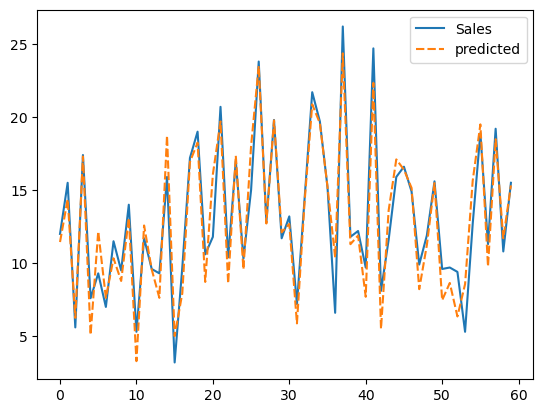

In [69]:
sns.lineplot(data=dct[['Sales', 'predicted']])

# Statsmodels : Simple Linear Regression

In [74]:
train, test = train_test_split(df, train_size=0.7, random_state=7)
# this test and train contains both x and y in one df
# this type of df is more suitable for statsmodel according to its formula is written as y ~ x1 + x2 + ...

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [79]:
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data = train).fit()
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     395.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           6.42e-67
Time:                        15:20:51   Log-Likelihood:                -271.78
No. Observations:                 140   AIC:                             551.6
Df Residuals:                     136   BIC:                             563.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5972      0.398      6.533      0.0

In [ ]:
model_a.params # coef